In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
from numpy import arange
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
raw_data = pd.read_csv("cluster_data_for_students.csv")
raw_data = raw_data.drop(["Unnamed: 0"], axis=1)

In [3]:
data_cols = raw_data.columns
print(data_cols)

Index(['IMONTH', 'IDAY', 'IYEAR', 'SEX', '_STATE', '_INCOMG', 'MARITAL',
       '_RACEGR3', '_RACEGR2', '_AGE80', 'MSCODE', 'EMPLOY', 'EMPLOY1',
       '_EDUCAG', '_BMI5CAT', 'HLTHPLN1', 'MEDCOST', 'CHECKUP1', 'GENHLTH',
       'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'QLACTLM2', 'DIFFWALK', 'DIFFDRES',
       'DIFFALON', 'DECIDE', '_SMOKER3', '_RFDRHV5', '_RFDRHV4', 'EXERANY2',
       'AVEDRNK2', 'DRNK3GE5', 'MAXDRNKS', 'BPHIGH4', 'TOLDHI2', '_FRUTSUM',
       '_VEGESUM', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNCR',
       'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3',
       'FLUSHOT5', 'FLUSHOT6', 'PNEUVAC3'],
      dtype='object')


### Data Definition:
https://docs.google.com/spreadsheets/d/1S1wqz5eGSACKbranY8SbDKdQiozpY2-RYgYHabcdDj8/edit?usp=sharing

In [4]:
raw_data.head()

,IMONTH,IDAY,IYEAR,SEX,_STATE,_INCOMG,MARITAL,_RACEGR3,_RACEGR2,_AGE80,...,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,FLUSHOT5,FLUSHOT6,PNEUVAC3
0,b'11',b'12',b'2012',2.0,46.0,2.0,1.0,NaN,1.0,70.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,NaN,1.0
1,b'03',b'11',b'2012',2.0,34.0,9.0,2.0,NaN,1.0,74.0,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,NaN,1.0
2,b'07',b'10',b'2013',1.0,12.0,3.0,1.0,1.0,NaN,71.0,...,1.0,1.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,NaN
3,b'12',b'18',b'2014',2.0,27.0,2.0,3.0,1.0,NaN,76.0,...,2.0,2.0,2.0,1.0,2.0,2.0,7.0,NaN,1.0,2.0
4,b'05',b'18',b'2014',2.0,25.0,9.0,3.0,1.0,NaN,66.0,...,1.0,1.0,1.0,1.0,1.0,2.0,3.0,NaN,1.0,1.0


### Student Assignment:
1. Is there a higher prevelance of chronic conditions in certain states?
2. Are there there natural clusters of people in this data?
3. How do the health characteristics differ between these clusters?
4. How do the behavior characteristics differ between these clusters?

###  1. Is there a higher prevelance of chronic conditions in certain states?

#### Data clean
combine two employ columns together

In [5]:
df = raw_data.copy()
df["EMPLOY"] = df["EMPLOY"].combine_first(df['EMPLOY1'])
df = df.drop(['EMPLOY1'],axis =1)

#### Map categorical variable to boolean value

In [6]:
mapped = {1:1,2:0, 7:None, 9:None}
col = ["_RFDRHV5", "EXERANY2", "PNEUVAC3", "FLUSHOT6", "CVDINFR4", "CVDCRHD4", "CVDSTRK3","ASTHMA3","CHCSCNCR","CHCOCNCR",\
       "CHCCOPD1","HAVARTH3","ADDEPEV2","CHCKIDNY","DIABETE3","HLTHPLN1","MEDCOST","DIFFWALK","DECIDE","DIFFALON","DIFFDRES","QLACTLM2"]

for c in col:
    df[c]=df[c].map(mapped)

mapped2 = {1:1, 2:0}
df["SEX"] = df["SEX"].map(mapped2)

#### Check and drop NA

In [7]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns


In [8]:
missing_df = missing_values_table(df)
missing_df.head(10)

Your selected dataframe has 51 columns.
There are 40 columns that have missing values.


,Missing Values,% of Total Values
FLUSHOT5,40659,81.3
_RACEGR2,40440,80.9
DIABETE3,39462,78.9
_VEGESUM,32716,65.4
_FRUTSUM,32111,64.2
TOLDHI2,31218,62.4
_RFDRHV5,30678,61.4
MAXDRNKS,30466,60.9
DRNK3GE5,30438,60.9
AVEDRNK2,30409,60.8


In [9]:
na_col = missing_df[missing_df["% of Total Values"]>50].index
print(na_col)

Index(['FLUSHOT5', '_RACEGR2', 'DIABETE3', '_VEGESUM', '_FRUTSUM', 'TOLDHI2',
       '_RFDRHV5', 'MAXDRNKS', 'DRNK3GE5', 'AVEDRNK2', 'BPHIGH4', 'POORHLTH'],
      dtype='object')


In [10]:
df_clean= df.drop(na_col, axis =1)
df_clean.head()

,IMONTH,IDAY,IYEAR,SEX,_STATE,_INCOMG,MARITAL,_RACEGR3,_AGE80,MSCODE,...,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,FLUSHOT6,PNEUVAC3
0,b'11',b'12',b'2012',0,46.0,2.0,1.0,NaN,70.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0
1,b'03',b'11',b'2012',0,34.0,9.0,2.0,NaN,74.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0
2,b'07',b'10',b'2013',1,12.0,3.0,1.0,1.0,71.0,5.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN
3,b'12',b'18',b'2014',0,27.0,2.0,3.0,1.0,76.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,b'05',b'18',b'2014',0,25.0,9.0,3.0,1.0,66.0,2.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


1 Alabama 7,031 1.45 1.49
2 Alaska 2,914 0.60 0.22
4 Arizona 10,952 2.25 2.09
5 Arkansas 5,298 1.09 0.90
6 California 11,393 2.34 11.98
8 Colorado 14,958 3.08 1.69
9 Connecticut 11,041 2.27 1.12
10 Delaware 4,057 0.83 0.30
11 District of Columbia 3,852 0.79 0.22
12 Florida 36,955 7.60 6.52
13 Georgia 5,381 1.11 3.09
15 Hawaii 8,087 1.66 0.45
16 Idaho 5,258 1.08 0.49
17 Illinois 4,764 0.98 3.91
18 Indiana 11,066 2.28 2.00
19 Iowa 7,257 1.49 0.95
20 Kansas 12,188 2.51 0.87
21 Kentucky 10,265 2.11 1.35
22 Louisiana 5,256 1.08 1.41
23 Maine 10,019 2.06 0.42
24 Maryland 18,473 3.80 1.85
25 Massachusetts 8,415 1.73 2.15
26 Michigan 12,024 2.47 3.05
27 Minnesota 16,831 3.46 1.67
28 Mississippi 5,135 1.06 0.90
29 Missouri 7,126 1.47 1.86
30 Montana 5,971 1.23 0.32
31 Nebraska 15,183 3.12 0.57
32 Nevada
33 New Hampshire 6,420 1.32 0.42
34 New Jersey 7,652 1.57 2.76
35 New Mexico 6,024 1.24 0.63
36 New York 34,190 7.03 6.16
37 North Carolina 6,536 1.34 3.10
38 North Dakota 5,742 1.18 0.23
39 Ohio 12,389 2.55 3.56
40 Oklahoma 6,925 1.42 1.18
41 Oregon 5,439 1.12 1.27
42 Pennsylvania 6,810 1.40 4.00
44 Rhode Island 5,457 1.12 0.33
45 South Carolina 11,236 2.31 1.53
46 South Dakota 5,767 1.19 0.26
47 Tennessee 6,167 1.27 2.04
48 Texas 11,709 2.41 8.20
49 Utah 10,988 2.26 0.84
50 Vermont 6,540 1.34 0.20
51 Virginia 9,002 1.85 2.60
53 Washington 14,259 2.93 2.23
54 West Virginia 7,151 1.47 0.58
55 Wisconsin 5,271 1.08 1.77
56 Wyoming 4,497 0.92 0.18
66 Guam 1,578 0.32 0.04
72 Puerto Rico 5,794 1.19 1.10
78 Virgin Islands


In [11]:
df_clean["_STATE"]= df_clean["_STATE"].astype(str)

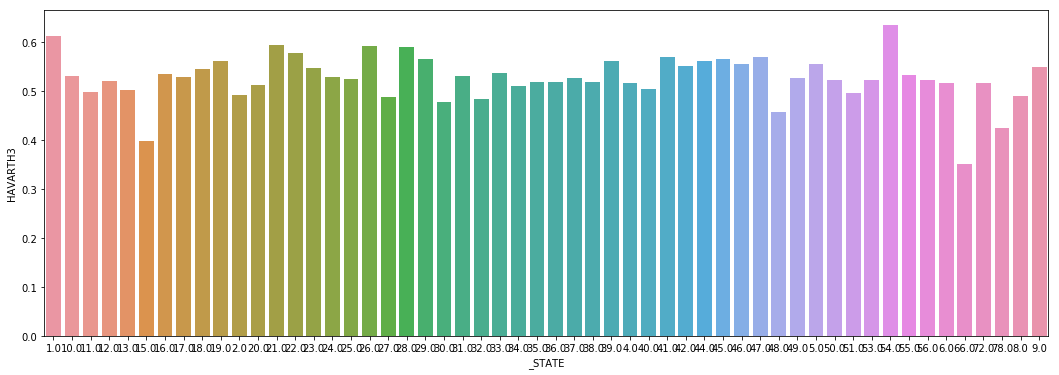

In [12]:
fig = plt.figure(figsize = (18,6))
dia = df_clean[["_STATE","HAVARTH3"]].groupby(["_STATE"],as_index=False).mean()
ax = sns.barplot(x="_STATE", y="HAVARTH3", data=dia)
plt.show()

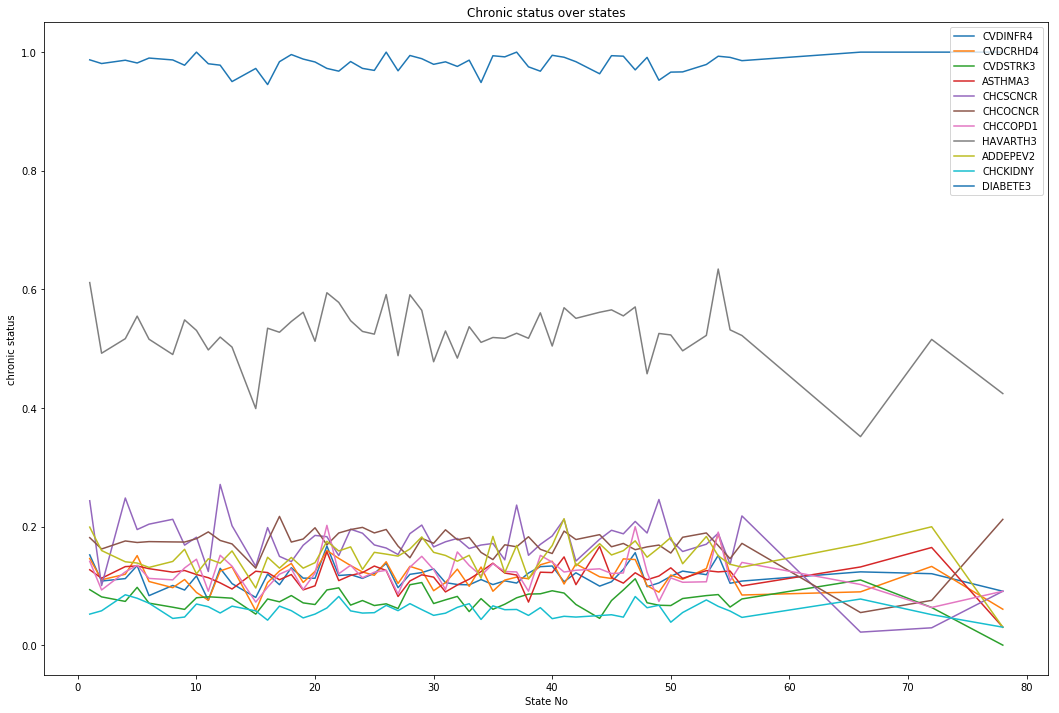

In [13]:
fig = plt.figure(figsize = (18,12))
chronic_col = ["CVDINFR4", "CVDCRHD4", "CVDSTRK3","ASTHMA3","CHCSCNCR","CHCOCNCR",\
       "CHCCOPD1","HAVARTH3","ADDEPEV2","CHCKIDNY","DIABETE3"]
for c in chronic_col:
    chronic_state = df.groupby(["_STATE"])[c].mean()
    plt.plot(chronic_state)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.xlabel("State No")
plt.ylabel("chronic status")   
plt.title("Chronic status over states")
plt.show()

According to the graph, the most common chronic condition is "Diagnoised with Diabetes", followed by "Diagnoised with Arthritis". For other uncommon chronic disease,  Florida noticed the most occurance of Skin Cancer, whereas Oregon observed the most frequence of Depression. 

### Are there there natural clusters of people in this data?

#### One hot encoding

In [14]:
df_clean.columns

Index(['IMONTH', 'IDAY', 'IYEAR', 'SEX', '_STATE', '_INCOMG', 'MARITAL',
       '_RACEGR3', '_AGE80', 'MSCODE', 'EMPLOY', '_EDUCAG', '_BMI5CAT',
       'HLTHPLN1', 'MEDCOST', 'CHECKUP1', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH',
       'QLACTLM2', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'DECIDE', '_SMOKER3',
       '_RFDRHV4', 'EXERANY2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3',
       'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY',
       'FLUSHOT6', 'PNEUVAC3'],
      dtype='object')

In [15]:
df_clean.head()

,IMONTH,IDAY,IYEAR,SEX,_STATE,_INCOMG,MARITAL,_RACEGR3,_AGE80,MSCODE,...,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,FLUSHOT6,PNEUVAC3
0,b'11',b'12',b'2012',0,46.0,2.0,1.0,NaN,70.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0
1,b'03',b'11',b'2012',0,34.0,9.0,2.0,NaN,74.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1.0
2,b'07',b'10',b'2013',1,12.0,3.0,1.0,1.0,71.0,5.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN
3,b'12',b'18',b'2014',0,27.0,2.0,3.0,1.0,76.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,b'05',b'18',b'2014',0,25.0,9.0,3.0,1.0,66.0,2.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


In [16]:
df_remove_NA = df_clean.dropna()
df_remove_NA = df_remove_NA.reset_index(drop=True)
df_remove_NA.head()

,IMONTH,IDAY,IYEAR,SEX,_STATE,_INCOMG,MARITAL,_RACEGR3,_AGE80,MSCODE,...,CVDSTRK3,ASTHMA3,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,FLUSHOT6,PNEUVAC3
0,b'12',b'18',b'2014',0,27.0,2.0,3.0,1.0,76.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,b'05',b'18',b'2014',0,25.0,9.0,3.0,1.0,66.0,2.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2,b'03',b'05',b'2013',0,12.0,3.0,3.0,1.0,72.0,5.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,b'05',b'04',b'2013',0,13.0,2.0,3.0,1.0,71.0,5.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
4,b'10',b'03',b'2013',0,15.0,3.0,3.0,1.0,80.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [17]:
categorical_col = ["_STATE", 'MARITAL', '_RACEGR3', 'MSCODE', 'EMPLOY', '_EDUCAG', "_BMI5CAT", 'GENHLTH', '_SMOKER3']
enc = OneHotEncoder()
onehot = enc.fit_transform(df_remove_NA[categorical_col]).toarray()
onehot.shape

(13992, 99)

#### PCA on categorical variable

In [18]:
pca_5 = PCA(n_components=5)
onehot_pca = pca_5.fit_transform(onehot)
onehot_pca.shape
onehot_pca

array([[ 0.79226742,  0.62654923, -0.63615917,  0.61342557, -0.26830945],
       [-0.43657564,  1.09169065, -0.00575684,  0.71166725, -0.46464712],
       [ 0.83072843,  0.2100154 , -0.11824637, -0.38670784, -0.18193786],
       ..., 
       [-0.37328036,  0.34818124,  1.40866313,  0.02041155,  0.29598735],
       [ 0.35358854,  0.46207761,  0.48651766, -0.58686709, -1.19327761],
       [ 0.58916801, -0.06384007, -0.76770766, -1.03620885,  0.32679341]])

In [19]:
drop_col = ['IMONTH', 'IDAY', 'IYEAR',"_STATE", 'MARITAL', '_RACEGR3', 'MSCODE', 'EMPLOY', '_EDUCAG', "_BMI5CAT", 'GENHLTH', '_SMOKER3']
train = df_remove_NA.drop(drop_col, axis =1)
train.shape

(13992, 27)

In [20]:
onehot_df = pd.DataFrame(onehot_pca)
onehot_df.head()

,0,1,2,3,4
0,0.792267,0.626549,-0.636159,0.613426,-0.268309
1,-0.436576,1.091691,-0.005757,0.711667,-0.464647
2,0.830728,0.210015,-0.118246,-0.386708,-0.181938
3,1.108672,0.790322,-0.037496,-0.743760,-0.522593
4,-0.120631,1.193861,0.099893,-0.844656,-0.216585


#### Concat PCA component to orginal dataset

In [21]:
X = pd.concat([train, onehot_df], axis=1, join_axes=[train.index])
X.shape

(13992, 32)

#### Decide how many PCA components

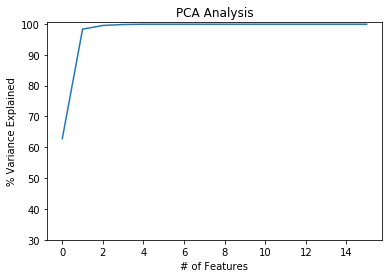

In [278]:
covar_matrix = PCA(n_components = 16) 
covar_matrix.fit(X)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

When n = 3, nearly 100% of variance are explained, so I select 3 components

In [22]:
pca = PCA(n_components=3)
train_pca = pca.fit_transform(X)
principalDf = pd.DataFrame(data = train_pca)
principalDf.head()

,0,1,2
0,-30.413903,-0.643212,-2.595824
1,67.105109,34.059055,6.724816
2,55.957951,34.547613,0.727020
3,41.916706,-41.304115,2.744115
4,-30.423904,-0.699437,-6.605234


In [27]:
loadings = pca.components_
list(zip(loadings[0],X.columns))

[(-0.00095445581740716495, 'SEX'),
 (-0.0055480324414453495, '_INCOMG'),
 (-0.0022287140076322075, '_AGE80'),
 (2.4039074983512917e-05, 'HLTHPLN1'),
 (0.00059958273424046951, 'MEDCOST'),
 (-0.00031395245488855097, 'CHECKUP1'),
 (-0.87129949892957226, 'PHYSHLTH'),
 (-0.49065424581313716, 'MENTHLTH'),
 (0.0035480791985560258, 'QLACTLM2'),
 (0.0032348804742197753, 'DIFFWALK'),
 (0.00096146440166124331, 'DIFFDRES'),
 (0.0015423467252536826, 'DIFFALON'),
 (0.0014022289995458124, 'DECIDE'),
 (-0.00068724222221003479, '_RFDRHV4'),
 (-0.0016751373198075049, 'EXERANY2'),
 (0.00083808900257043017, 'CVDINFR4'),
 (0.00095040066396675095, 'CVDCRHD4'),
 (0.00064772728520139631, 'CVDSTRK3'),
 (0.0010190075334328883, 'ASTHMA3'),
 (6.04894964461743e-05, 'CHCSCNCR'),
 (0.00045754585928337369, 'CHCOCNCR'),
 (0.0013360209318004955, 'CHCCOPD1'),
 (0.0026425811682175152, 'HAVARTH3'),
 (0.0024836621348587758, 'ADDEPEV2'),
 (0.00050274936061682561, 'CHCKIDNY'),
 (0.00025900878642778625, 'FLUSHOT6'),
 (0.00077

In [28]:
list(zip(loadings[1],X.columns))

[(-0.00096323248410450535, 'SEX'),
 (-0.0028650705137726346, '_INCOMG'),
 (-0.013130743104281079, '_AGE80'),
 (-3.8330221307012374e-06, 'HLTHPLN1'),
 (0.00029300339746074944, 'MEDCOST'),
 (-0.00011376668719162955, 'CHECKUP1'),
 (0.49067264420268625, 'PHYSHLTH'),
 (-0.87123386028504357, 'MENTHLTH'),
 (-0.00040266843368838112, 'QLACTLM2'),
 (-0.00032047030867079113, 'DIFFWALK'),
 (4.2964853817976137e-05, 'DIFFDRES'),
 (-4.1758103596186197e-05, 'DIFFALON'),
 (0.0011176837666434399, 'DECIDE'),
 (0.00048279447629011996, '_RFDRHV4'),
 (0.00044368137521153916, 'EXERANY2'),
 (-0.00027652671031235931, 'CVDINFR4'),
 (-0.00032573522547301408, 'CVDCRHD4'),
 (-0.000193738544654702, 'CVDSTRK3'),
 (-5.6083892820709086e-05, 'ASTHMA3'),
 (-0.00018192614410931615, 'CHCSCNCR'),
 (-0.00027740277404504724, 'CHCOCNCR'),
 (-0.000318203283477436, 'CHCCOPD1'),
 (-8.6200269166923933e-05, 'HAVARTH3'),
 (0.002688066999318236, 'ADDEPEV2'),
 (-0.00019574157364818024, 'CHCKIDNY'),
 (-0.00033298799136074678, 'FLUSHOT

#### Decide how many clusters  to divide

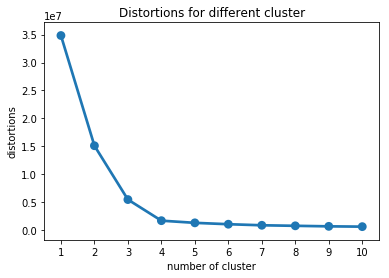

In [266]:
distortions = []
for i in range(1,11):
    knn = KMeans(n_clusters = i,
                init = "k-means++",
                n_init = 20,
                max_iter = 300,
                random_state = 0)
    knn.fit_predict(X)
    #y_pred = knn.predict(X_test_std)
    distortions.append(knn.inertia_)

x = np.arange(1,11,1)
sns.pointplot(x, distortions, marker = 'o')
plt.xlabel('number of cluster')
plt.ylabel('distortions')
plt.title('Distortions for different cluster')
plt.show()

There are four clusters in this dataset

#### plot clusters

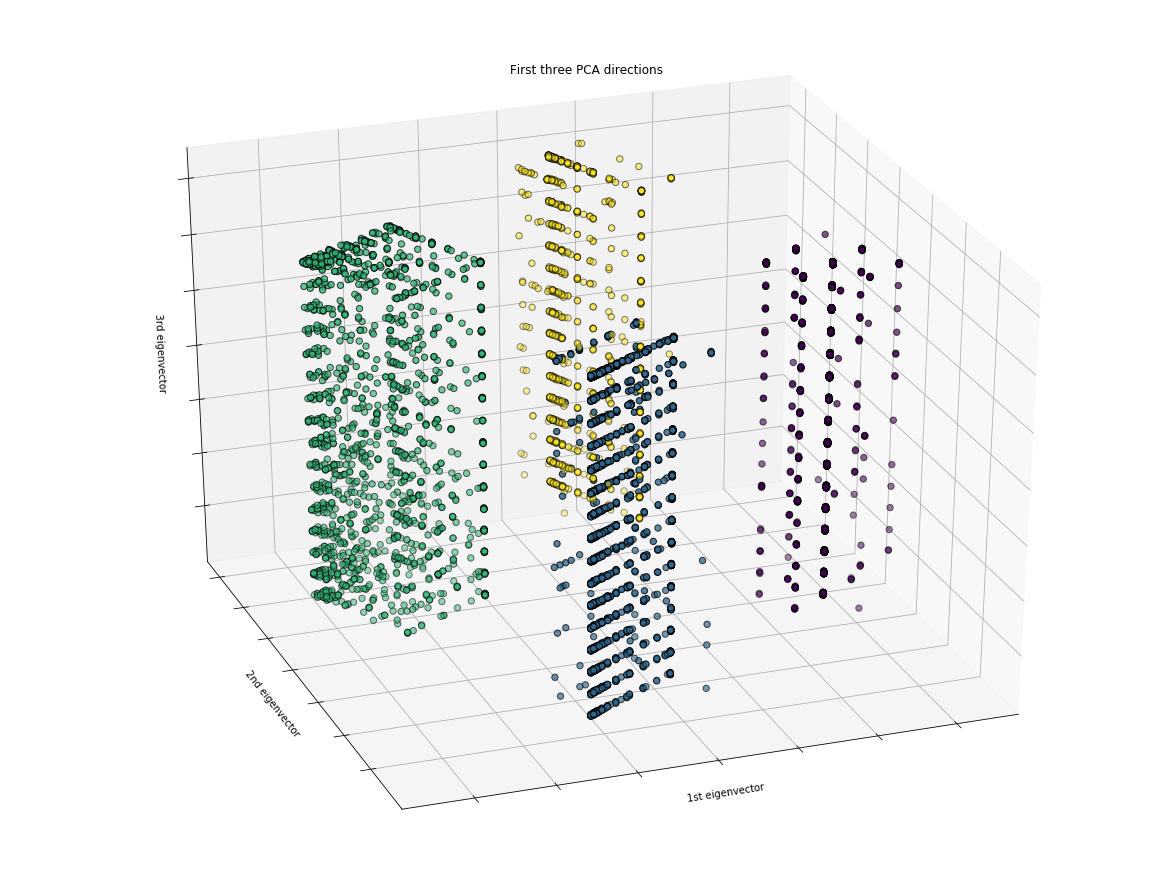

In [280]:
fig = plt.figure(1, figsize=(16, 12))
labels = KMeans(4, random_state=0).fit_predict(principalDf)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1],principalDf.iloc[:, 2],c=labels,\
           cmap='viridis', edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

##### How do the health and behavior characteristics differ between these clusters?

In [282]:
X["label"] = labels
X.head()

,SEX,_INCOMG,_AGE80,HLTHPLN1,CHECKUP1,PHYSHLTH,MENTHLTH,_RFDRHV4,EXERANY2,HAVARTH3,PNEUVAC3,0,1,2,3,4,label
0,0,2.0,76.0,1.0,1.0,88.0,88.0,1.0,1.0,1.0,0.0,0.798329,0.574697,-0.621939,0.620888,-0.254786,0
1,0,9.0,66.0,1.0,1.0,20.0,10.0,1.0,0.0,1.0,1.0,-0.408879,1.088084,-0.029539,0.707092,-0.500938,2
2,0,3.0,72.0,1.0,3.0,30.0,15.0,1.0,0.0,1.0,1.0,0.842320,0.213370,-0.144797,-0.379792,-0.155362,2
3,0,2.0,71.0,1.0,1.0,5.0,88.0,1.0,1.0,1.0,1.0,1.134293,0.755939,-0.116245,-0.737699,-0.507847,1
4,0,3.0,80.0,1.0,1.0,88.0,88.0,1.0,0.0,1.0,1.0,-0.078773,1.175640,0.018231,-0.851280,-0.209917,0


In [288]:
col_names = X.columns
result  = pd.DataFrame(columns = col_names)

for col in X.columns:
    result[col]=X.groupby(["label"])[col].mean()
result

,SEX,_INCOMG,_AGE80,HLTHPLN1,CHECKUP1,PHYSHLTH,MENTHLTH,_RFDRHV4,EXERANY2,HAVARTH3,PNEUVAC3,0,1,2,3,4,label
label,,,,,,,,,,,,,,,,,
0,0.396970,4.540656,73.505267,0.987099,1.341224,87.712274,87.890638,1.205942,0.752515,0.450468,0.685998,0.007272,-0.082768,-0.002647,0.008972,-0.044397,0
1,0.359505,4.306874,74.007478,0.989359,1.308024,12.825999,87.762726,1.145240,0.602243,0.642508,0.767616,-0.007005,0.111542,-0.014690,-0.016422,0.048724,1
2,0.287199,3.754376,72.715536,0.987418,1.332057,15.053063,11.838621,1.148796,0.562910,0.724836,0.754923,-0.022251,0.165261,0.000870,-0.010054,0.116642,2
3,0.259072,4.281857,72.734177,0.989030,1.305485,87.452321,8.828692,1.219409,0.716456,0.561181,0.697890,0.003029,0.007916,0.060633,-0.000273,-0.006347,3


Compared to cluster 0,1, cluster 2,3 have better mental health, Compared to cluster 0 and 3, cluster 1 and 2 have better physical health status. Cluster 2 has less income and has less physical activities such as running or walking for exercise but highest occurance on Arthritis.